# Cournot Oligopoly: How Prices Decrease with More Firms

## Introduction

The Cournot oligopoly model demonstrates a fundamental principle in industrial organization: **as the number of firms increases in a market, prices decrease and approach the competitive level**. This notebook explores this relationship through mathematical analysis and visualizations.

## Key Concepts

- **Cournot Competition**: Firms choose quantities simultaneously
- **Market Power**: Ability to set prices above marginal cost
- **Competitive Limit**: As n → ∞, price approaches marginal cost
- **Welfare Effects**: Consumer surplus increases, producer surplus decreases


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up plotting style with Rose Pine Dawn theme (light background)
plt.style.use('rose-pine-dawn')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Cournot Model Setup

Let's define the basic Cournot model with:
- **Demand**: P = a - bQ (linear demand)
- **Cost**: C = cq (constant marginal cost)
- **n firms**: Each firm chooses quantity q_i simultaneously


In [6]:
# Model parameters
a = 100  # Demand intercept
b = 1    # Demand slope
c = 10   # Marginal cost

print(f"Demand function: P = {a} - {b}Q")
print(f"Marginal cost: c = {c}")
print(f"Competitive price (P = MC): {c}")
print(f"Monopoly price: {(a + c) / 2}")


Demand function: P = 100 - 1Q
Marginal cost: c = 10
Competitive price (P = MC): 10
Monopoly price: 55.0


## 2. Nash Equilibrium Solutions

For n symmetric firms in Cournot competition, the Nash equilibrium is:

- **Individual quantity**: q* = (a - c) / [b(n + 1)]
- **Total quantity**: Q* = n(a - c) / [b(n + 1)]
- **Market price**: P* = (a + nc) / (n + 1)
- **Individual profit**: π* = (a - c)² / [b(n + 1)²]


In [7]:
def cournot_equilibrium(n_firms, a, b, c):
    """
    Calculate Cournot equilibrium for n firms.
    
    Args:
        n_firms: Number of firms
        a, b, c: Demand and cost parameters
    
    Returns:
        Dictionary with equilibrium values
    """
    # Individual quantity
    q_star = (a - c) / (b * (n_firms + 1))
    
    # Total quantity
    Q_star = n_firms * q_star
    
    # Market price
    P_star = (a + n_firms * c) / (n_firms + 1)
    
    # Individual profit
    pi_star = (a - c)**2 / (b * (n_firms + 1)**2)
    
    # Total profit
    total_pi = n_firms * pi_star
    
    # Consumer surplus
    CS = 0.5 * (a - P_star) * Q_star
    
    # Producer surplus
    PS = total_pi
    
    # Total surplus
    TS = CS + PS
    
    # Competitive benchmark
    Q_competitive = (a - c) / b
    P_competitive = c
    CS_competitive = 0.5 * (a - c) * Q_competitive
    TS_competitive = CS_competitive
    
    return {
        'n_firms': n_firms,
        'individual_quantity': q_star,
        'total_quantity': Q_star,
        'price': P_star,
        'individual_profit': pi_star,
        'total_profit': total_pi,
        'consumer_surplus': CS,
        'producer_surplus': PS,
        'total_surplus': TS,
        'competitive_quantity': Q_competitive,
        'competitive_price': P_competitive,
        'competitive_consumer_surplus': CS_competitive,
        'competitive_total_surplus': TS_competitive,
        'efficiency_ratio': TS / TS_competitive,
        'deadweight_loss': TS_competitive - TS
    }

# Test with different numbers of firms
firm_counts = [1, 2, 3, 4, 5, 10, 20, 50, 100]
results = []

for n in firm_counts:
    result = cournot_equilibrium(n, a, b, c)
    results.append(result)

# Create DataFrame for analysis
df = pd.DataFrame(results)
print("Cournot Equilibrium Results:")
print(df[['n_firms', 'price', 'total_quantity', 'individual_profit', 'efficiency_ratio']].round(2))


Cournot Equilibrium Results:
   n_firms  price  total_quantity  individual_profit  efficiency_ratio
0        1  55.00           45.00            2025.00              0.75
1        2  40.00           60.00             900.00              0.89
2        3  32.50           67.50             506.25              0.94
3        4  28.00           72.00             324.00              0.96
4        5  25.00           75.00             225.00              0.97
5       10  18.18           81.82              66.94              0.99
6       20  14.29           85.71              18.37              1.00
7       50  11.76           88.24               3.11              1.00
8      100  10.89           89.11               0.79              1.00


## 3. Price Decrease Analysis

Let's analyze how prices decrease as the number of firms increases:


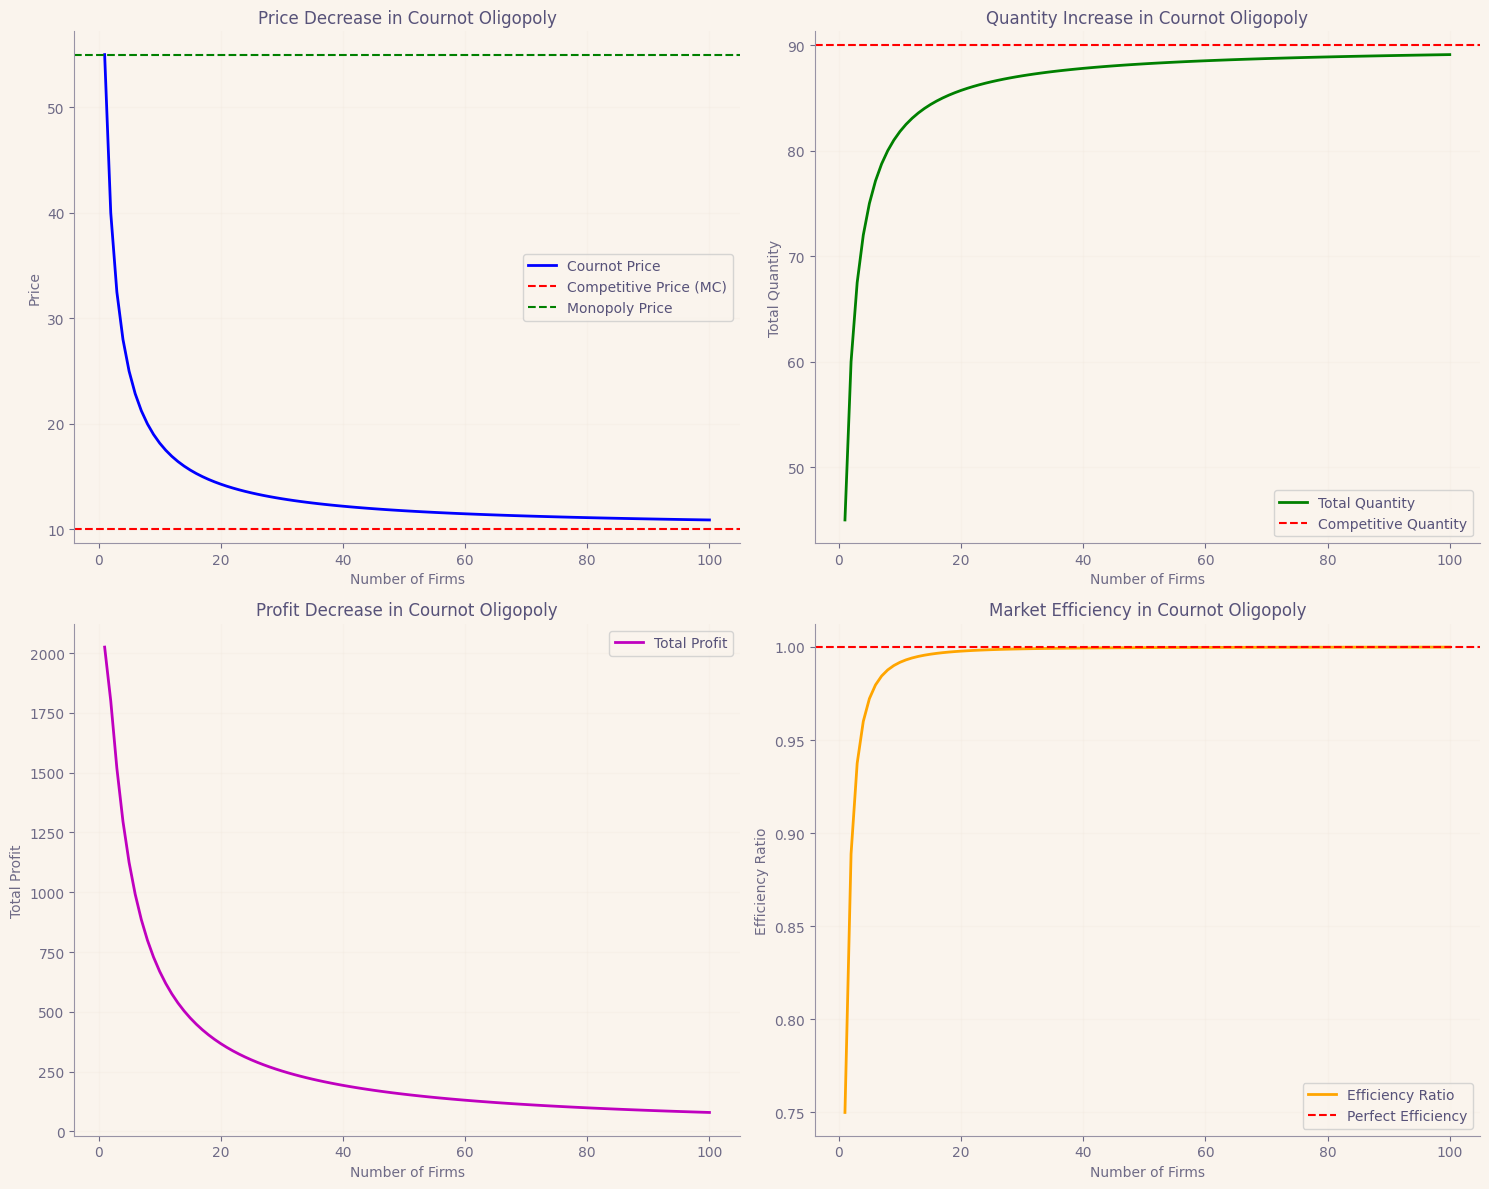

=== KEY INSIGHTS ===
Monopoly (n=1): Price = 55.00, Quantity = 45.00
Duopoly (n=2): Price = 40.00, Quantity = 60.00
10 firms: Price = 18.18, Quantity = 81.82
50 firms: Price = 11.76, Quantity = 88.24
100 firms: Price = 10.89, Quantity = 89.11
Competitive: Price = 10.00, Quantity = 90.00


In [8]:
# Create comprehensive analysis
n_range = np.arange(1, 101)  # 1 to 100 firms
prices = []
quantities = []
profits = []
efficiency = []

for n in n_range:
    result = cournot_equilibrium(n, a, b, c)
    prices.append(result['price'])
    quantities.append(result['total_quantity'])
    profits.append(result['total_profit'])
    efficiency.append(result['efficiency_ratio'])

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Price vs Number of Firms
axes[0, 0].plot(n_range, prices, 'b-', linewidth=2, label='Cournot Price')
axes[0, 0].axhline(y=c, color='r', linestyle='--', label='Competitive Price (MC)')
axes[0, 0].axhline(y=(a + c) / 2, color='g', linestyle='--', label='Monopoly Price')
axes[0, 0].set_xlabel('Number of Firms')
axes[0, 0].set_ylabel('Price')
axes[0, 0].set_title('Price Decrease in Cournot Oligopoly')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Total Quantity vs Number of Firms
axes[0, 1].plot(n_range, quantities, 'g-', linewidth=2, label='Total Quantity')
axes[0, 1].axhline(y=(a - c) / b, color='r', linestyle='--', label='Competitive Quantity')
axes[0, 1].set_xlabel('Number of Firms')
axes[0, 1].set_ylabel('Total Quantity')
axes[0, 1].set_title('Quantity Increase in Cournot Oligopoly')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Total Profit vs Number of Firms
axes[1, 0].plot(n_range, profits, 'm-', linewidth=2, label='Total Profit')
axes[1, 0].set_xlabel('Number of Firms')
axes[1, 0].set_ylabel('Total Profit')
axes[1, 0].set_title('Profit Decrease in Cournot Oligopoly')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Efficiency Ratio vs Number of Firms
axes[1, 1].plot(n_range, efficiency, 'orange', linewidth=2, label='Efficiency Ratio')
axes[1, 1].axhline(y=1, color='r', linestyle='--', label='Perfect Efficiency')
axes[1, 1].set_xlabel('Number of Firms')
axes[1, 1].set_ylabel('Efficiency Ratio')
axes[1, 1].set_title('Market Efficiency in Cournot Oligopoly')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print key insights
print("=== KEY INSIGHTS ===")
print(f"Monopoly (n=1): Price = {prices[0]:.2f}, Quantity = {quantities[0]:.2f}")
print(f"Duopoly (n=2): Price = {prices[1]:.2f}, Quantity = {quantities[1]:.2f}")
print(f"10 firms: Price = {prices[9]:.2f}, Quantity = {quantities[9]:.2f}")
print(f"50 firms: Price = {prices[49]:.2f}, Quantity = {quantities[49]:.2f}")
print(f"100 firms: Price = {prices[99]:.2f}, Quantity = {quantities[99]:.2f}")
print(f"Competitive: Price = {c:.2f}, Quantity = {(a-c)/b:.2f}")
